# Environment Setup

In [1]:
## Standard libraries
import os
import time
import json
import math
import numpy as np
import scipy
from scipy.linalg import fractional_matrix_power as frac_mat_pow

## Imports for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

## Progress bar
from tqdm.notebook import tqdm

## PyTorch
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as data
import torch.optim as optim
from torch.utils.tensorboard import SummaryWriter
%load_ext tensorboard

import projection
import unittest

In [ ]:
projection.setup_gpu()

## Testing

In [ ]:
!python -m unittest

# Algorithm 3 (X Constructor)

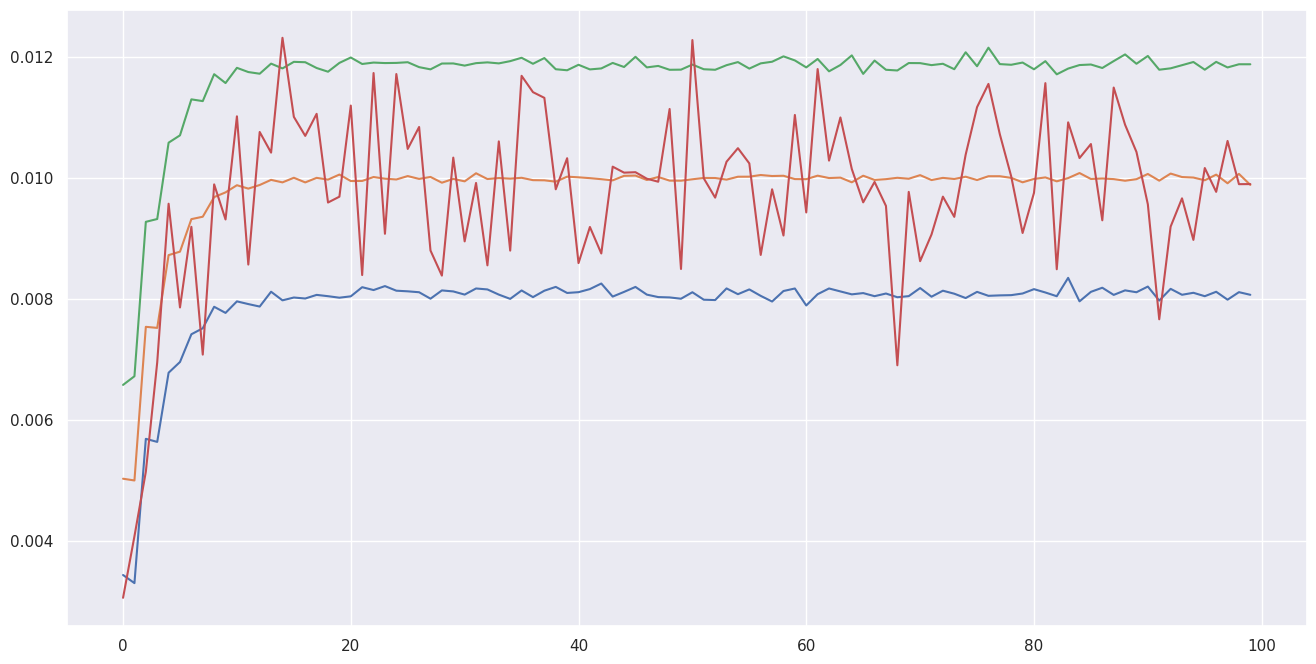

In [8]:
problem = projection.OU_Projection_Problem()
X = problem.simulate_x()
projection.fan_diagram(X)

In [5]:
# # # Testing

# for i in range(1, T):
#     print(X[0][i]-X[0][i-1])

# fig = plt.figure(figsize=(16,8))
# # plt.plot(X[0])
# # plt.show()
# print("*"*40)
# for i in range(10):
#     print("#"*10,i,"#"*10)
#     print(X[0][i])
#     print("*"*10)
#     print(Drift[0][i])
#     print("*"*10)
#     print(Diffusion[0][i])
#     print("\n\n\n\n\")

# Algorithm 1 (Input-Output Generator)

In [6]:
sigma_2 = torch.matrix_power(Sigma,2)
sigma_neg_2 = torch.matrix_power(torch.linalg.pinv(Sigma), 2)
Z_N = []
for n in range(N):
    x_n = X[n]
    drift_n = Drift[n]
    Y_X = []
    for t in range(T):
        x_t = x_n[t+1] # the X was indexed from -1
        drift_t = drift_n[t+1] # Drift_n_t (indexes for drift are one ahead)
        mu_x_t =  x_t + drift_t
        sigma_x_t = torch.mul(
            varsigma(x_t),
            torch.matmul(
                sigma_2,
                torch.from_numpy(frac_mat_pow(
                    torch.matmul(
                        sigma_neg_2,
                        torch.matrix_power(
                            torch.add(
                                torch.mul(Lambda, torch.eye(d)),
                                torch.mul(varsigma(x_t), Sigma))
                            , 2)
                        )
                    , 1/2)).type(torch.FloatTensor)
                )
            )
        Y_X.append([mu_x_t, sigma_x_t])
    Z = [x_n, Y_X]
    Z_N.append(Z)

NameError: ignored

In [ ]:
# # # TESTING
for i in range(4):
    print("#"*5,i,"#"*5)
    print("\tX")
    print(Z_N[0][0][i])
    print("\tY_X, containing mu and sigma")
    print(Z_N[0][1][i][0])
    print(Z_N[0][1][i][1])
    print("\n\n\n\n")


# fig1 = plt.figure(figsize=(16,8))
# plt.title("Z_N[0][0]")
# plt.plot(Z_N[0][0])
# plt.show()


# fig2 = plt.figure(figsize=(16,8))
# plt.title("Z_N[0][1]")
# plt.plot(Z_N[0][1])
# plt.show()

## Saving Results

In [ ]:
from google.colab import files

vars = [N, T, d]
torch.save(vars, 'vars.pt')
torch.save(Z_N, 'Z_N.pt')

files.download('vars.pt')
files.download('Z_N.pt')

In [ ]:
!du -hal

## Profiling

In [ ]:
import pandas as pd
from ydata_profiling import ProfileReport


df = pd.read_csv("data/Train_Dataset.csv")
profile = ProfileReport(df, title="Pandas Profiling Report")
profile